In [ ]:
'''
    Name: Alfarizy
    Neptun code: THUAYP
'''
# Build classification models to predict whether the cancer type is Malignant or Benign.


In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from sklearn.preprocessing import LabelEncoder

In [3]:
# Find the data here: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset/download?datasetVersionNumber=1
data = pd.read_csv('Bee Colony Census Data by County.csv')


In [4]:
data.head()

,index,Year,Period,State,State ANSI,Ag District,Ag District Code,County,County ANSI,Value,CV (%)
0,0,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,AUTAUGA,1.0,119,27.7
1,1,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,DALLAS,47.0,65,27.7
2,2,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,ELMORE,51.0,190,27.7
3,3,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,GREENE,63.0,14,27.7
4,4,2012,END OF DEC,ALABAMA,1,BLACK BELT,40,HALE,65.0,10,27.7


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
data.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [5]:
data.columns.values

array(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean',
       'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se',
       'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
       'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'], dtype=object)

In [20]:
# Check for any null values initially
has_nulls_initially = data.isnull().values.any()

# Fill null values
prepared_data = data.fillna(" ")  # Adjust this based on your data type and requirements

# Recheck for null values
has_nulls_after_filling = prepared_data.isnull().values.any()

# Print initial and post-fill null status
print("Had nulls initially:", has_nulls_initially)
print("Has nulls after fill:", has_nulls_after_filling)

# Print the count of nulls in each column (should be all zeros after fillna)
print(prepared_data.isnull().sum())


Had nulls initially: False
Has nulls after fill: False
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [21]:
# Identify duplicate rows in the DataFrame
duplicates = data[data.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are:", duplicates)

# Show the original shape of the DataFrame
print("\nOriginal DataFrame shape:", data.shape)

# Remove duplicate rows and assign the result to a new DataFrame
data_no_duplicates = data.drop_duplicates()

# Display information about the new DataFrame
data_no_duplicates.info()

# Print the shape of the new DataFrame
print("\nShape of DataFrame after removing duplicates:", data_no_duplicates.shape)


Duplicate Rows except first occurrence based on all columns are: Empty DataFrame
Columns: [diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst]
Index: []

[0 rows x 31 columns]

Original DataFrame shape: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean     

In [25]:
# Apply label encoding to each categorical column
data_no_duplicates['diagnosis'] = LabelEncoder().fit_transform(data_no_duplicates['diagnosis'])

# Display DataFrame information and shape
data_no_duplicates.info()
print(data_no_duplicates.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [26]:
# Encode categorical variables
label_encoders = {}
for column in ['diagnosis']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [27]:
final_data = data_no_duplicates
final_data.columns.values
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


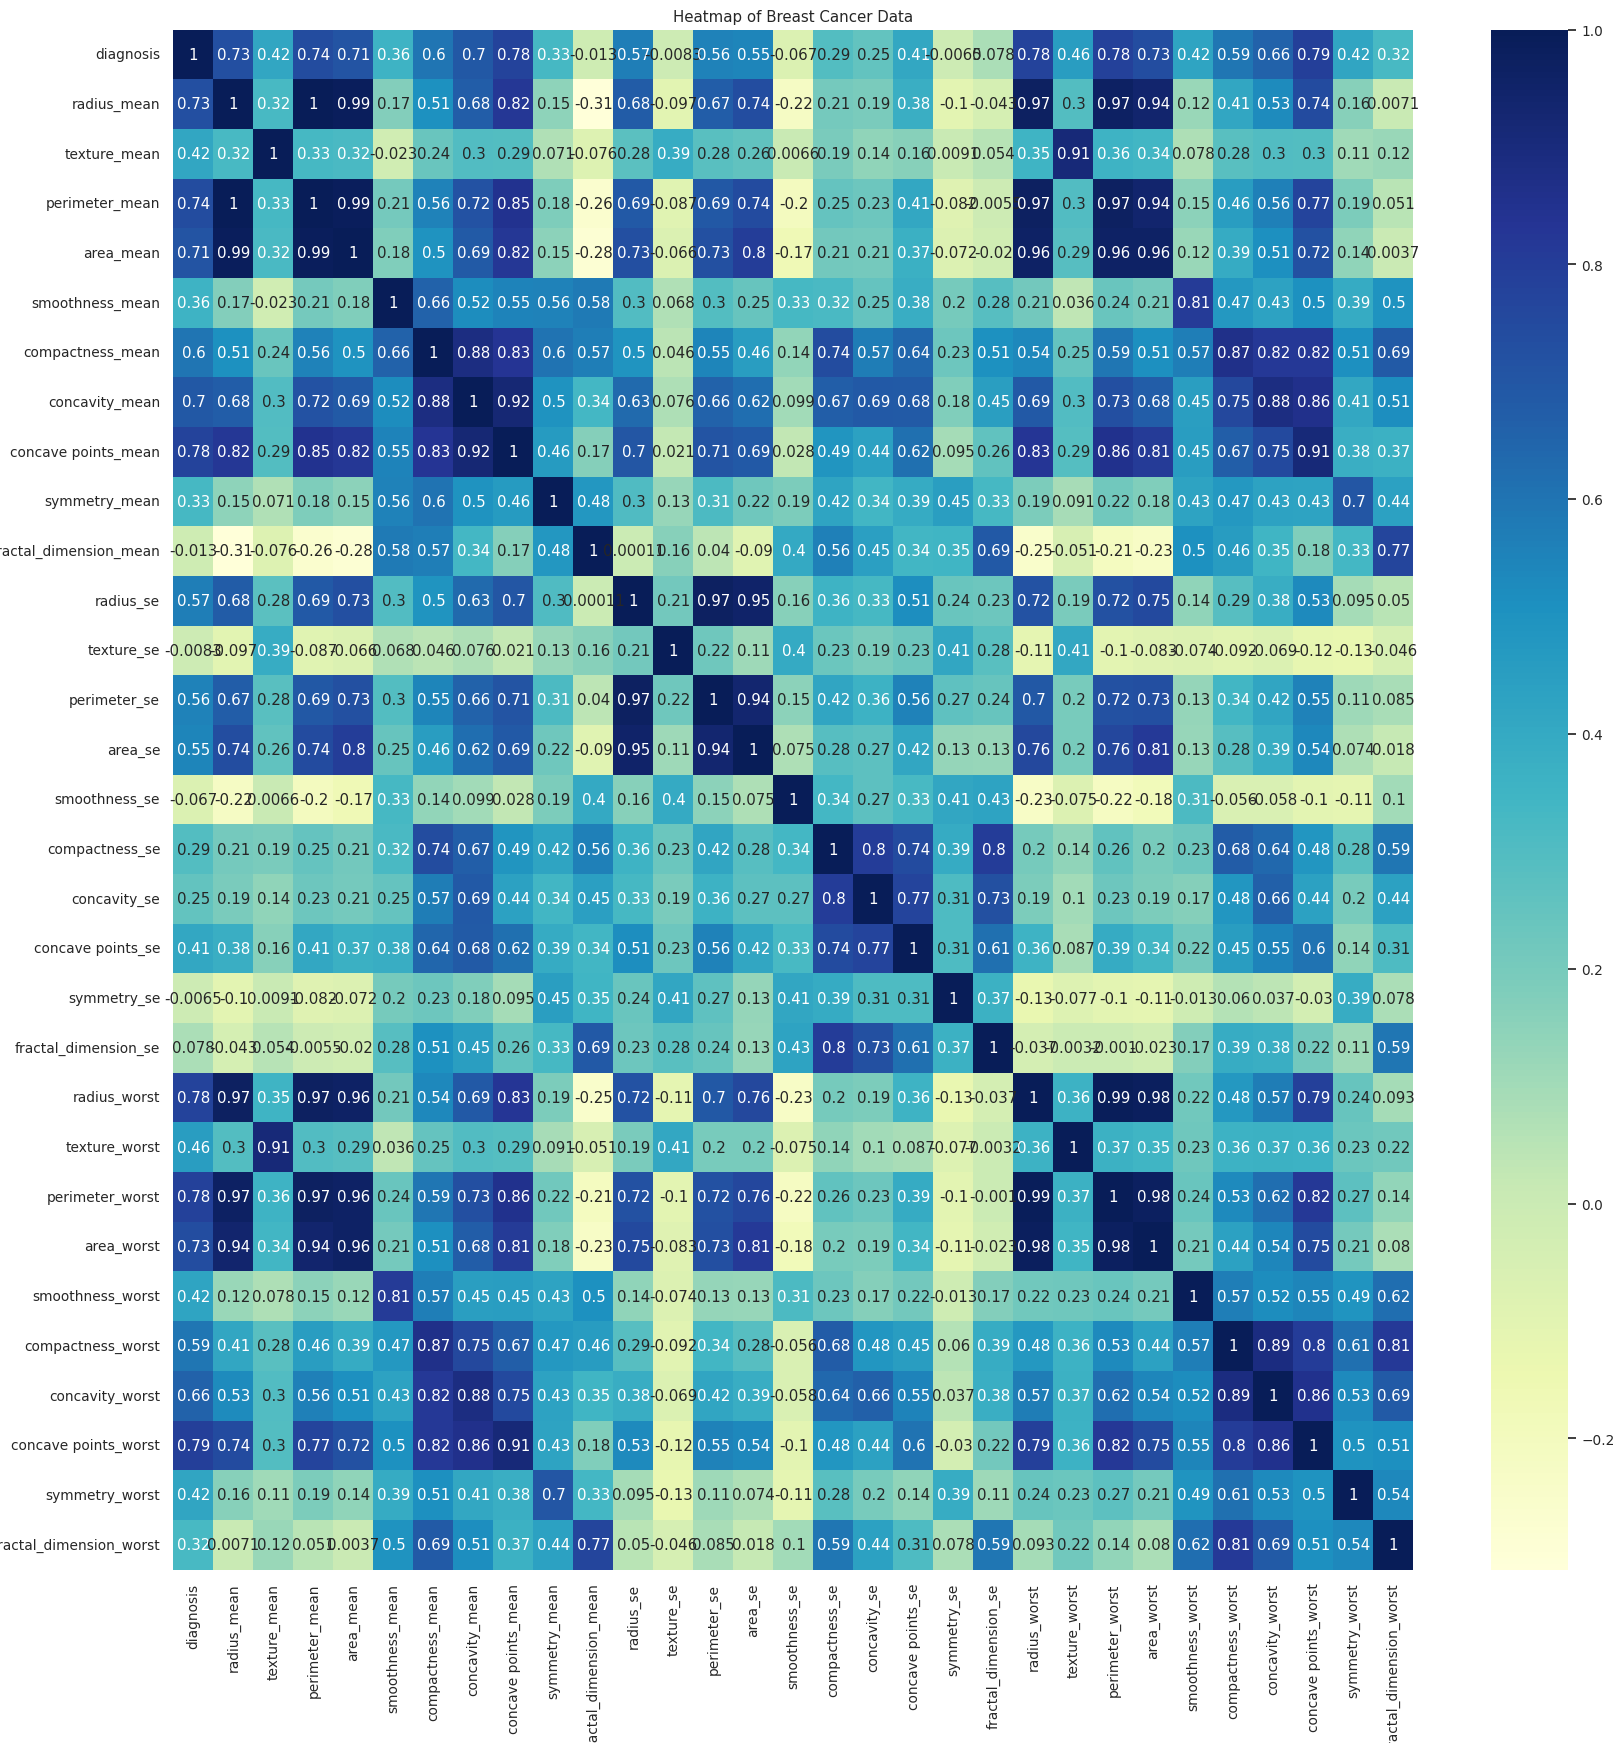

                         diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.

In [46]:
# Matrix Correlation
final_data_corr = final_data.corr()

plt.figure(figsize=(20,20))
with sns.axes_style("white"):
    sns.heatmap(final_data_corr, cmap="YlGnBu", annot=True)
    sns.set(font_scale=0.9)
    plt.title('Heatmap of Breast Cancer Data')
plt.show()

# Correlation of another DataFrame
final_data.corr(method='pearson')

# Get the absolute value of the correlation
cor_target = abs(final_data_corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.items()]


# Drop the target variable from the results
names.remove('diagnosis')

print(final_data_corr)

In [48]:
x = data[names]
y = data['diagnosis']

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42) #split the  data into traing and validating
scaler = StandardScaler() # Create an instance of standard scaler
scaler.fit(x_train) # Fit it to the training data

scaler.transform(x_train) # Transform training data
scaler.transform(x_test) # Transform validation data

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [58]:
def train_evaluate_model(model, x_train, y_train, x_test,y_test):    
    model.fit(x_train, y_train)  # Fit the model instance 

    predictions = model.predict(x_test) # Calculate predictions

    # Compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    # Create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

In [99]:
lg = LogisticRegression()

lg_results = train_evaluate_model(lg, x_train, y_train, x_test, y_test)

lg_results.index = ['LogisticRegression']

lg_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

/Users/helloimrizy/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074


In [78]:
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree, x_train, y_train, x_test, y_test)

decision_tree_results.index = ['DecisionTree']

decision_tree_results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
DecisionTree,0.921053,0.896552,0.886364,0.906977,0.918277


In [90]:
KNN = KNeighborsClassifier(n_neighbors=12)

knn = train_evaluate_model(KNN, x_train, y_train, x_test, y_test)
knn.index =['KNearsNeighbors']
knn.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116


In [92]:
rfc = RandomForestClassifier()

rfc_result = train_evaluate_model(rfc, x_train, y_train, x_test, y_test)
rfc_result.index = ['RandomForest']

rfc_result.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074


In [93]:
xgboost = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, x_train, y_train, x_test, y_test)
xgboost_result.index = ['XGBoost']

xgboost_result.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032


In [95]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, x_train, y_train, x_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

Naive_Bayes_result.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116


In [102]:
# Append the results
combined_results = pd.concat([knn, decision_tree_results, lg_results, rfc_result, Naive_Bayes_result, xgboost_result])

# Sort by f1_score and apply the color gradient
combined_results_sorted = combined_results.sort_values(by='f1_score', ascending=False)
combined_results_sorted.style.background_gradient(cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))


,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.921053,0.898876,0.869565,0.930233,0.922863


In [ ]:
# Conclusion

# Naive Bayes and K-Nearest Neighbors (KNN) algorithms perform similarly and achieve the highest precision scores.